In [1423]:

import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline
import plotly.express as px
sns.set_style('darkgrid')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import plotly.express as px


## Wczytanie danych.

In [1424]:
df = pd.read_csv('german_credit_data.csv', sep=';', encoding='latin-1')

In [1425]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [1426]:
df.shape

(2003, 21)

In [1427]:
nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
print(nulls_summary)

                        Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
checking_status         False                   0               0.0
duration                 True                   2               0.1
credit_history           True                   2               0.1
purpose                  True                   2               0.1
credit_amount            True                   2               0.1
savings_status           True                   2               0.1
employment               True                   2               0.1
installment_commitment   True                   2               0.1
personal_status          True                   2               0.1
other_parties            True                   2               0.1
residence_since          True                   2               0.1
property_magnitude       True                   2               0.1
age                      True                   2               0.1
other_payment_plans      True                   

In [1428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         2003 non-null   object
 1   duration                2001 non-null   object
 2   credit_history          2001 non-null   object
 3   purpose                 2001 non-null   object
 4   credit_amount           2001 non-null   object
 5   savings_status          2001 non-null   object
 6   employment              2001 non-null   object
 7   installment_commitment  2001 non-null   object
 8   personal_status         2001 non-null   object
 9   other_parties           2001 non-null   object
 10  residence_since         2001 non-null   object
 11  property_magnitude      2001 non-null   object
 12  age                     2001 non-null   object
 13  other_payment_plans     2001 non-null   object
 14  housing                 2001 non-null   object
 15  exis

In [1429]:
df['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid', nan,
       'credit_history'], dtype=object)

In [1430]:
df['existing_credits'].unique()

array(['2', '1', '3', '4', nan, 'existing_credits'], dtype=object)

In [1431]:
df['savings_status'].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500',
       nan, 'savings_status'], dtype=object)

## Czyszczenie danych.

In [1432]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1998     True
1999     True
2000     True
2001     True
2002    False
Length: 2003, dtype: bool

In [1433]:
_df = df.drop_duplicates()\
    .drop(2002, axis=0)\
    .drop(1001, axis=0)\
    .drop(1000, axis=0)\
    .rename(columns={'personal_status':'sex'})\
    .rename(columns={'class':'risk'})
   
_df  
    


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [1434]:
# zmiana typów object na int64
_df['age'] = _df['age'].astype(np.int64)
_df['credit_amount'] = _df['credit_amount'].astype(np.int64)
_df['duration'] = _df['duration'].astype(np.int64)
_df['installment_commitment']=_df['installment_commitment'].astype(np.int64)
_df['residence_since']=_df['residence_since'].astype(np.int64)
_df['existing_credits']=_df['existing_credits'].astype(np.int64)
_df['num_dependents']=_df['num_dependents'].astype(np.int64)


In [1435]:
status_replase = ['male','female']
status_job = ['unskilled/non-resident', 'unskilled/resident', 'skilled', 'highly skilled']

In [1436]:
personal_status_replase = {'male single': 'male', 'female div/dep/mar': 'female', 'male div/sep': 'male',
       'male mar/wid': 'male'}
job_status_replase = {'unemp/unskilled non res': 'unskilled/non-resident','unskilled resident':'unskilled/resident', 'skilled': 'skilled', 'high qualif/self emp/mgmt': 'highly skilled'}

_df.replace(personal_status_replase, inplace=True)
_df.replace(job_status_replase, inplace=True)
_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male,none,...,real estate,49,none,own,1,unskilled/resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [1437]:
#Zmiana zależnej zmiennej kategorycznej na numeryczną
_df['risk']=_df['risk'].replace('good', 1)
_df['risk']=_df['risk'].replace('bad', 0)

_df['risk'].value_counts()

risk
1    700
0    300
Name: count, dtype: int64

In [1438]:
_df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
sex                       object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
risk                       int64
dtype: object

In [1439]:
_df['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

In [1440]:
_df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


## EDA.

#### opis kolumn:

* **age** (int)
* **sex** (male, female)
* **job** (unskilled and non-resident, unskilled and resident, skilled, highly skilled)
* **housing** (own, rent, or free)
* **savings_status**  (no known savings, <100, 500<=X<1000, >=1000, 100<=X<500)
* **credit_history** (critical/other existing credit, existing paid, delayed previously, no credits/all paid, all paid)
* **duration** (int, in month)
* **purpose** ( used car, new car, furniture/equipment, radio/TV, domestic appliance, repairs, education, business, other, retraining)
* **credit_amount** (int)
* **checking_status** (<0, 0<=X<200, no checking, >=200)
* **employment** (>=7, 1<=X<4, 4<=X<7, unemployed, <1)
* **installment_commitment** (4, 2, 3, 1)
* **other_parties** (none, guarantor, co applicant)
* **residence_since** (4, 2, 3, 1)
* **property_magnitude** (real estate, life insurance, no known property, car)
* **other_payment_plans** (none, bank, stores)
* **existing_credits** (1, 2, 3, 4)
* **num_dependents** (1, 2)
* **own_telephone** (yes, none)
* **foreign_worker** (yes, no)
* **risk** (1, 0)

### Wiualizacja kategorii dystrybucji dobrych i złych kont.

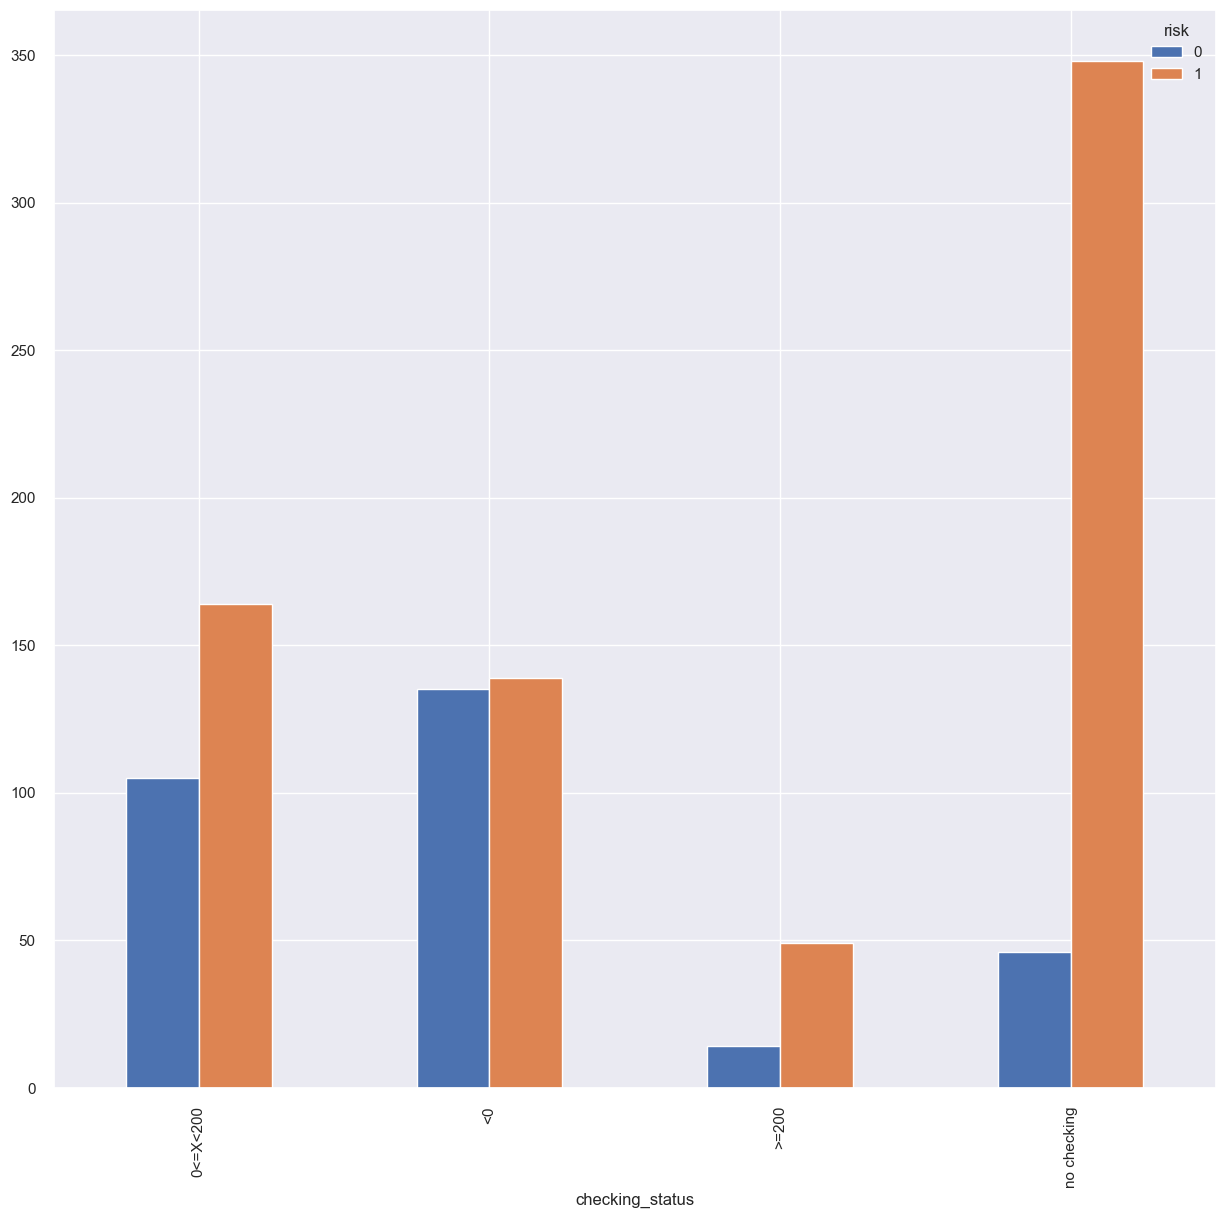

In [1441]:
pd.crosstab(_df.checking_status, _df['risk']).plot(kind='bar')
xlabel='checking_status'

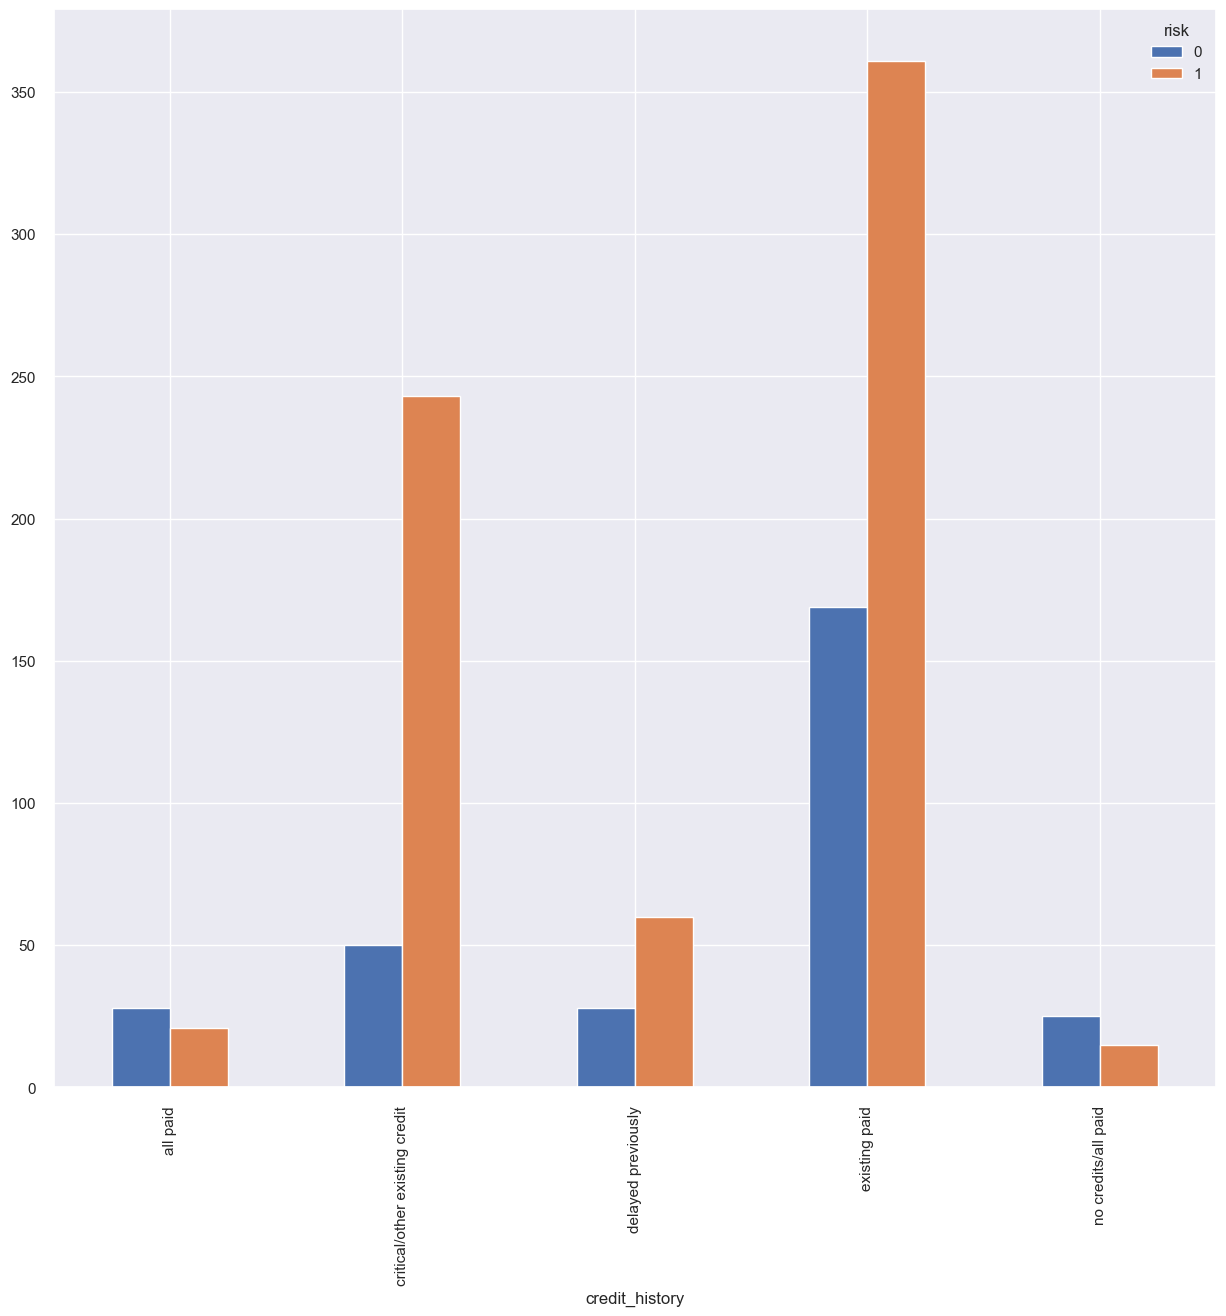

In [1442]:
pd.crosstab(_df.credit_history, _df['risk']).plot(kind='bar')
xlabel='credit_history'

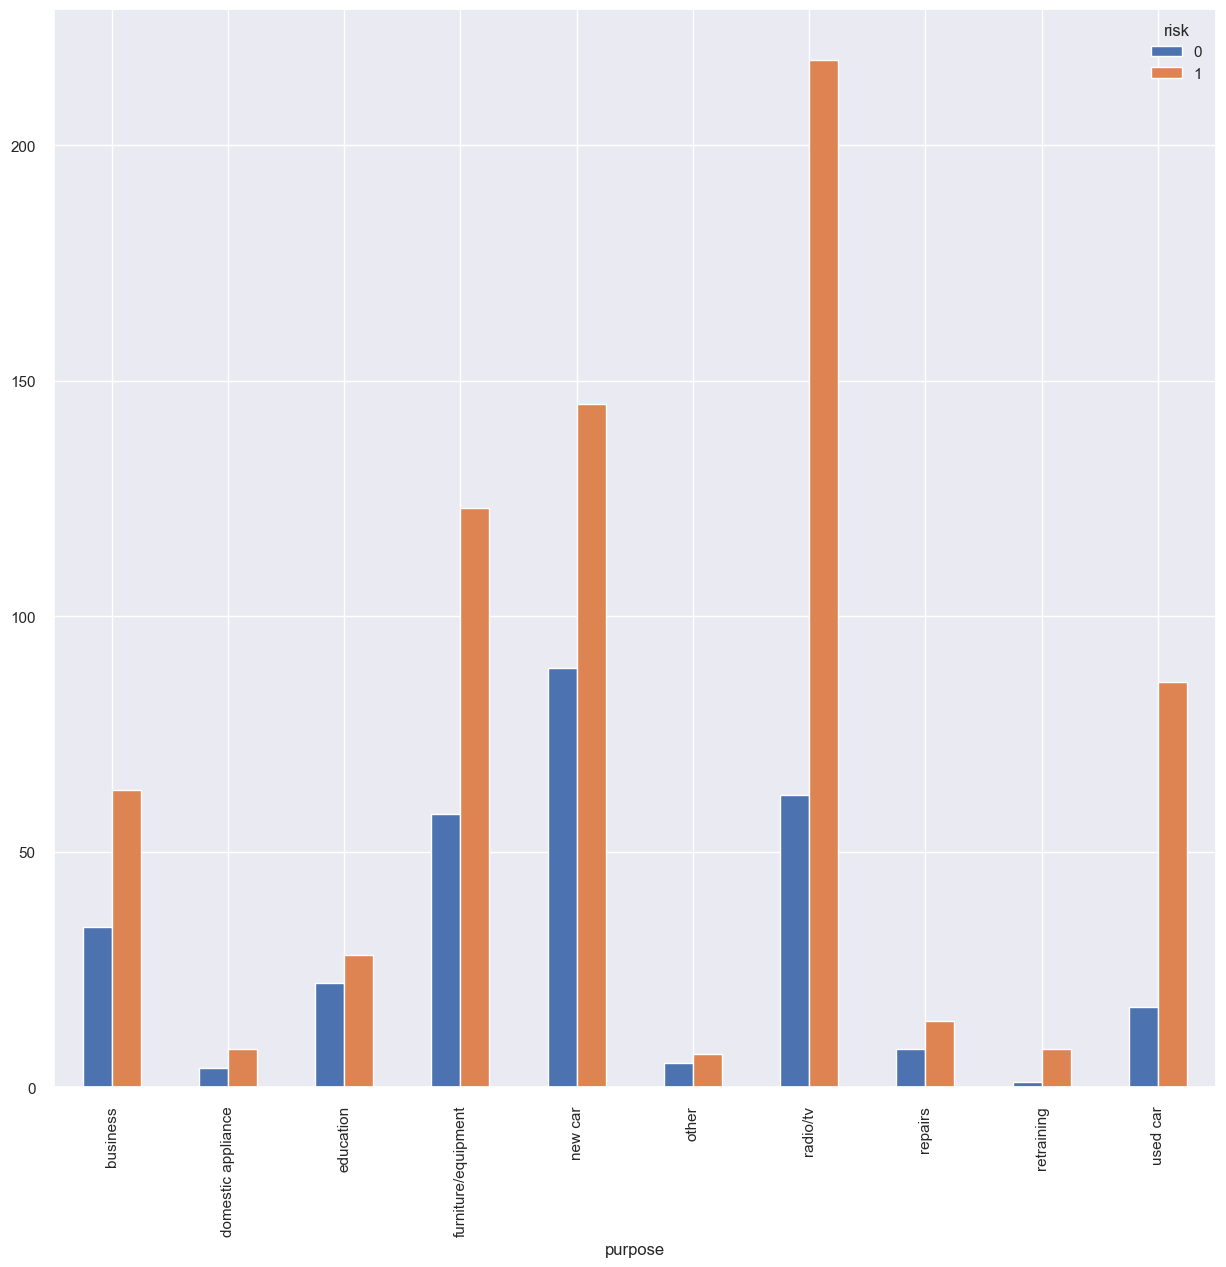

In [1443]:
pd.crosstab(_df.purpose, _df['risk']).plot(kind='bar')
xlabel='purpose'

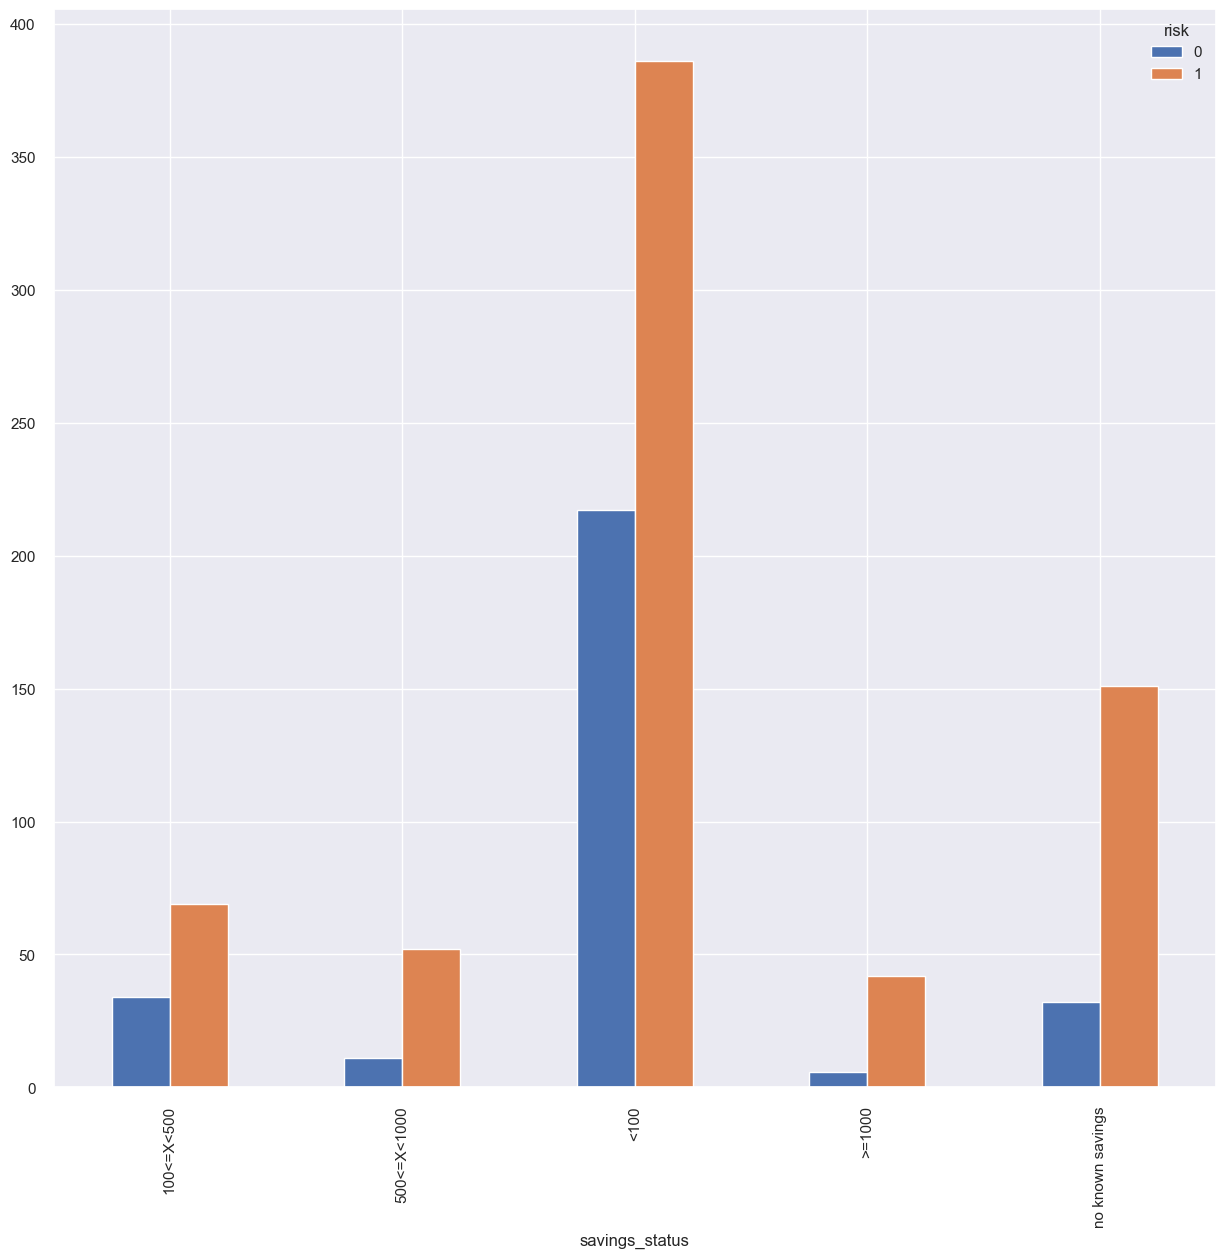

In [1444]:
pd.crosstab(_df.savings_status, _df['risk']).plot(kind='bar')
xlabel='savings_status'

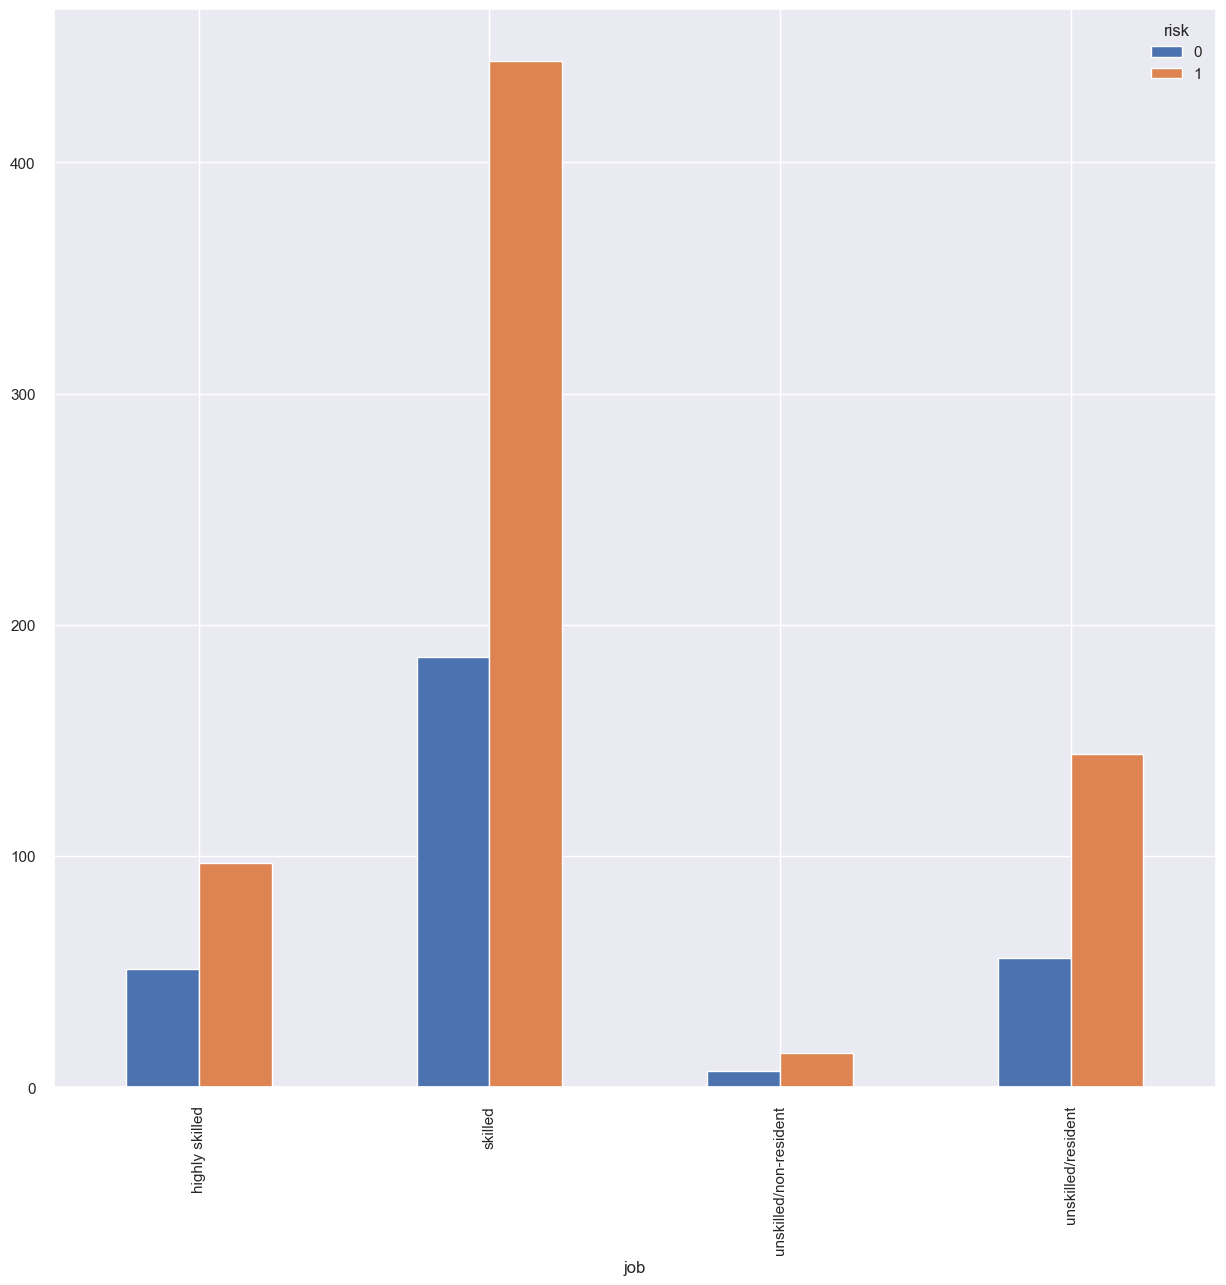

In [1445]:
pd.crosstab(_df.job, _df['risk']).plot(kind='bar')
xlabel='job'

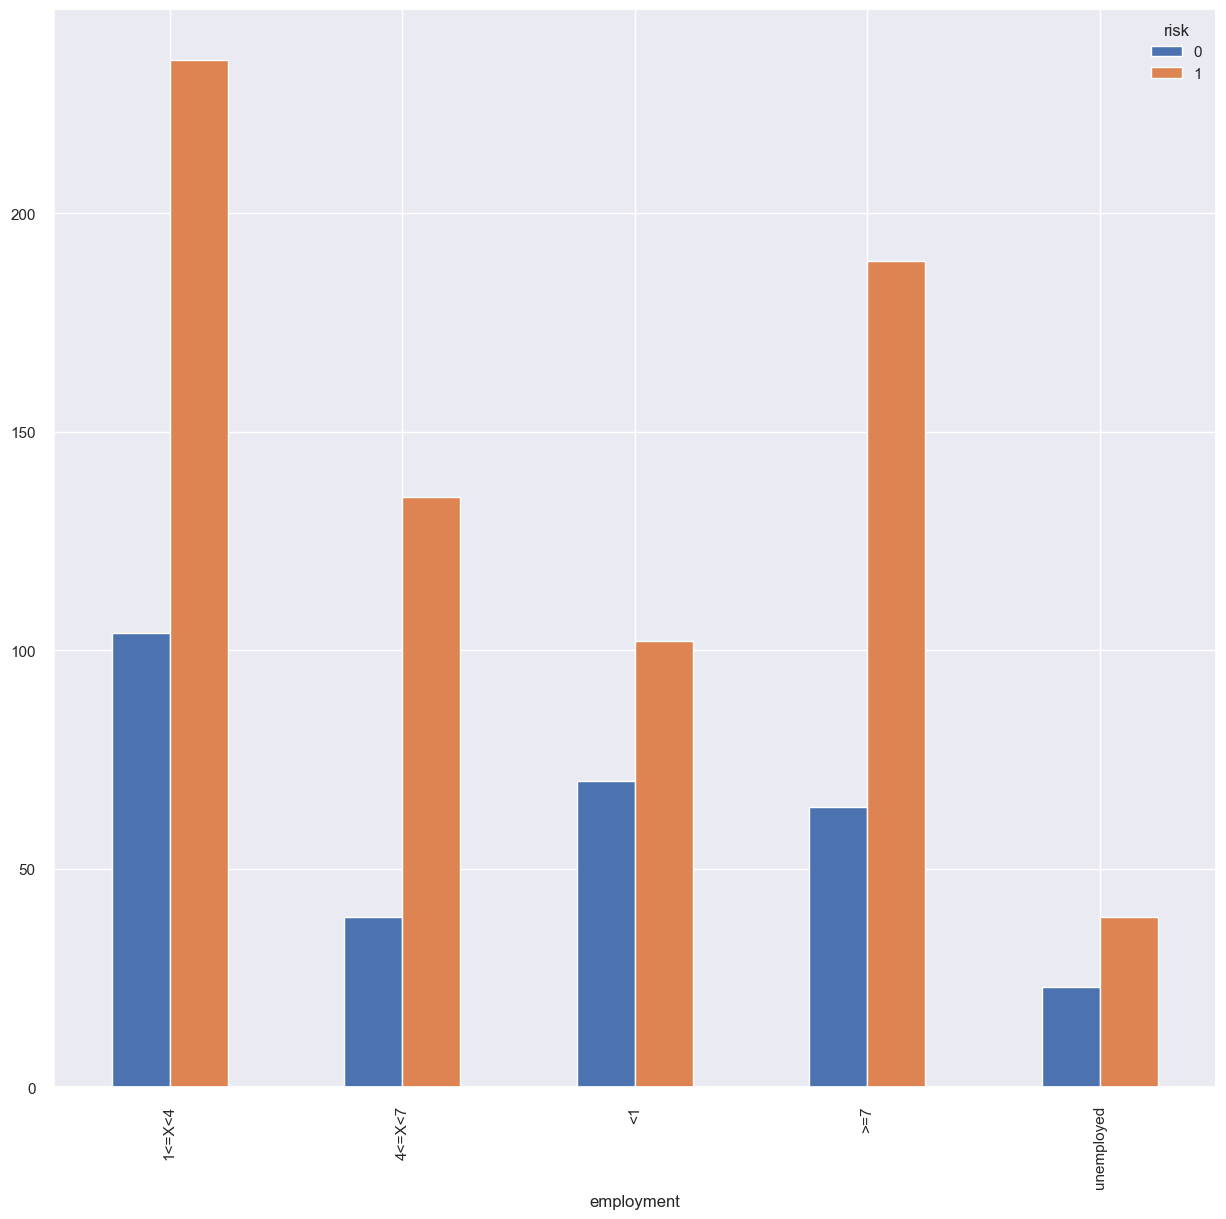

In [1446]:
pd.crosstab(_df.employment, _df['risk']).plot(kind='bar')
xlabel='employment'

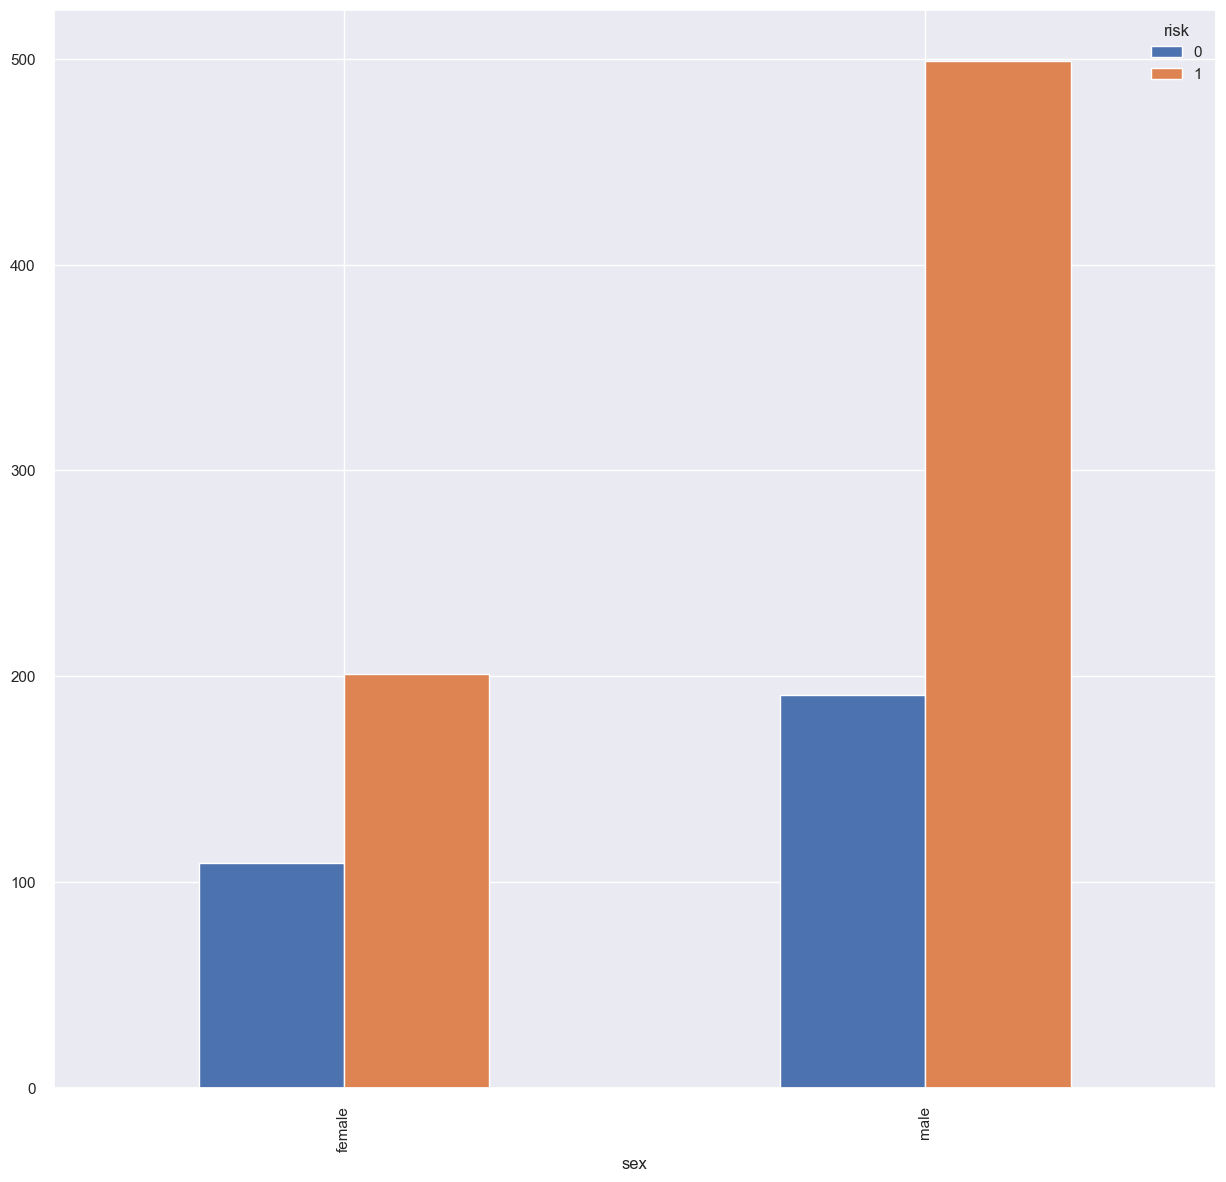

In [1447]:
pd.crosstab(_df.sex, _df['risk']).plot(kind='bar')
xlabel='sex'

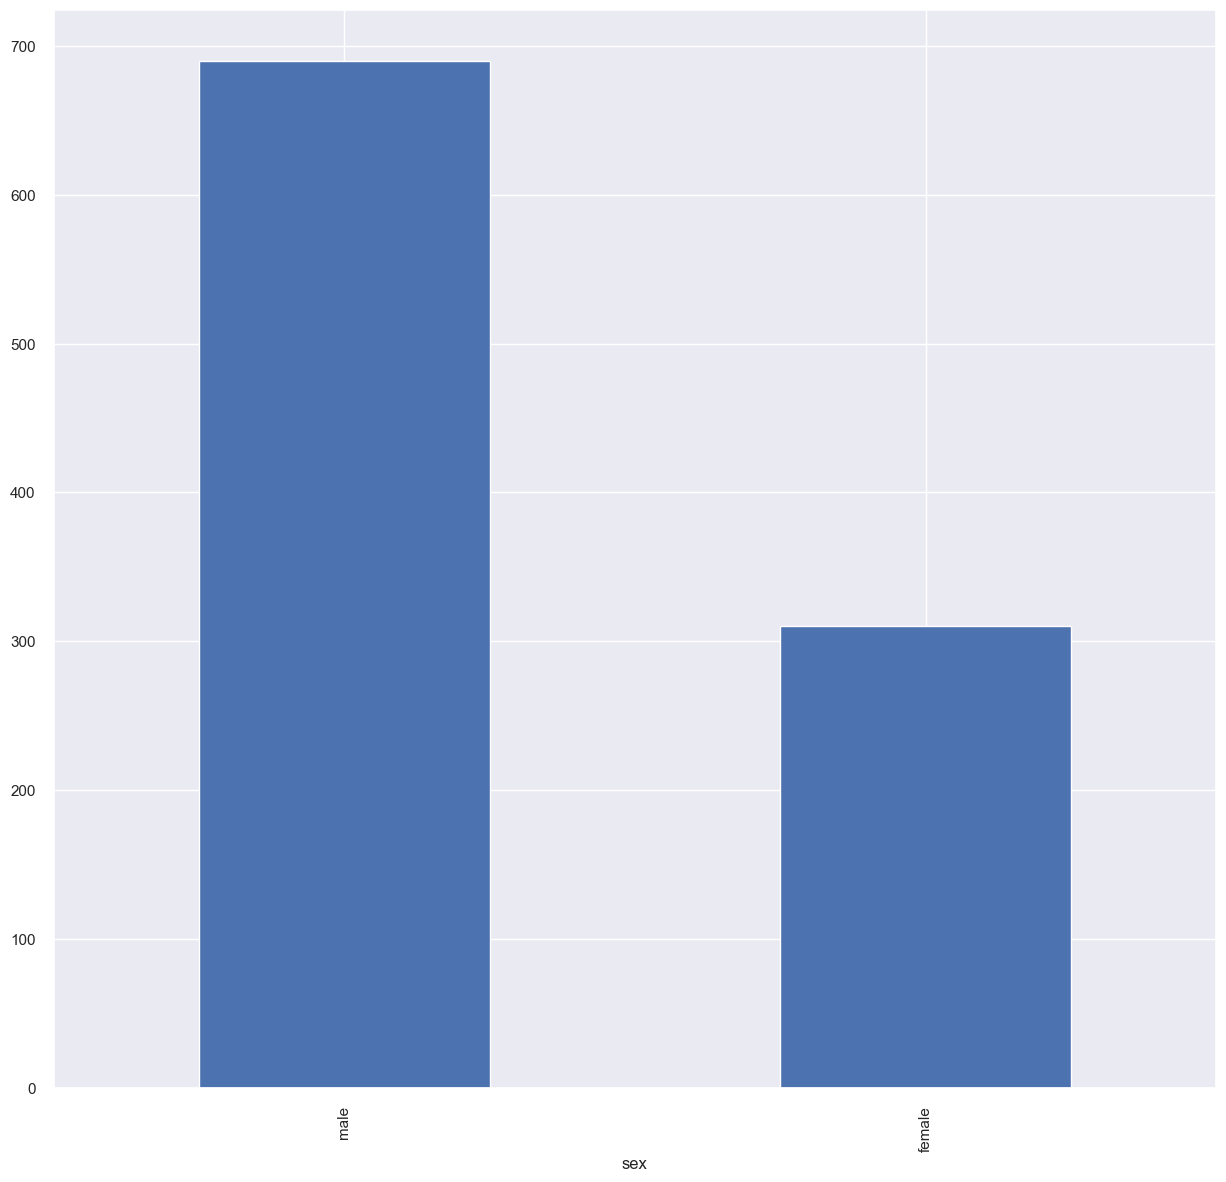

In [1448]:
_df.sex.value_counts().plot.bar()
xlabel='sex'

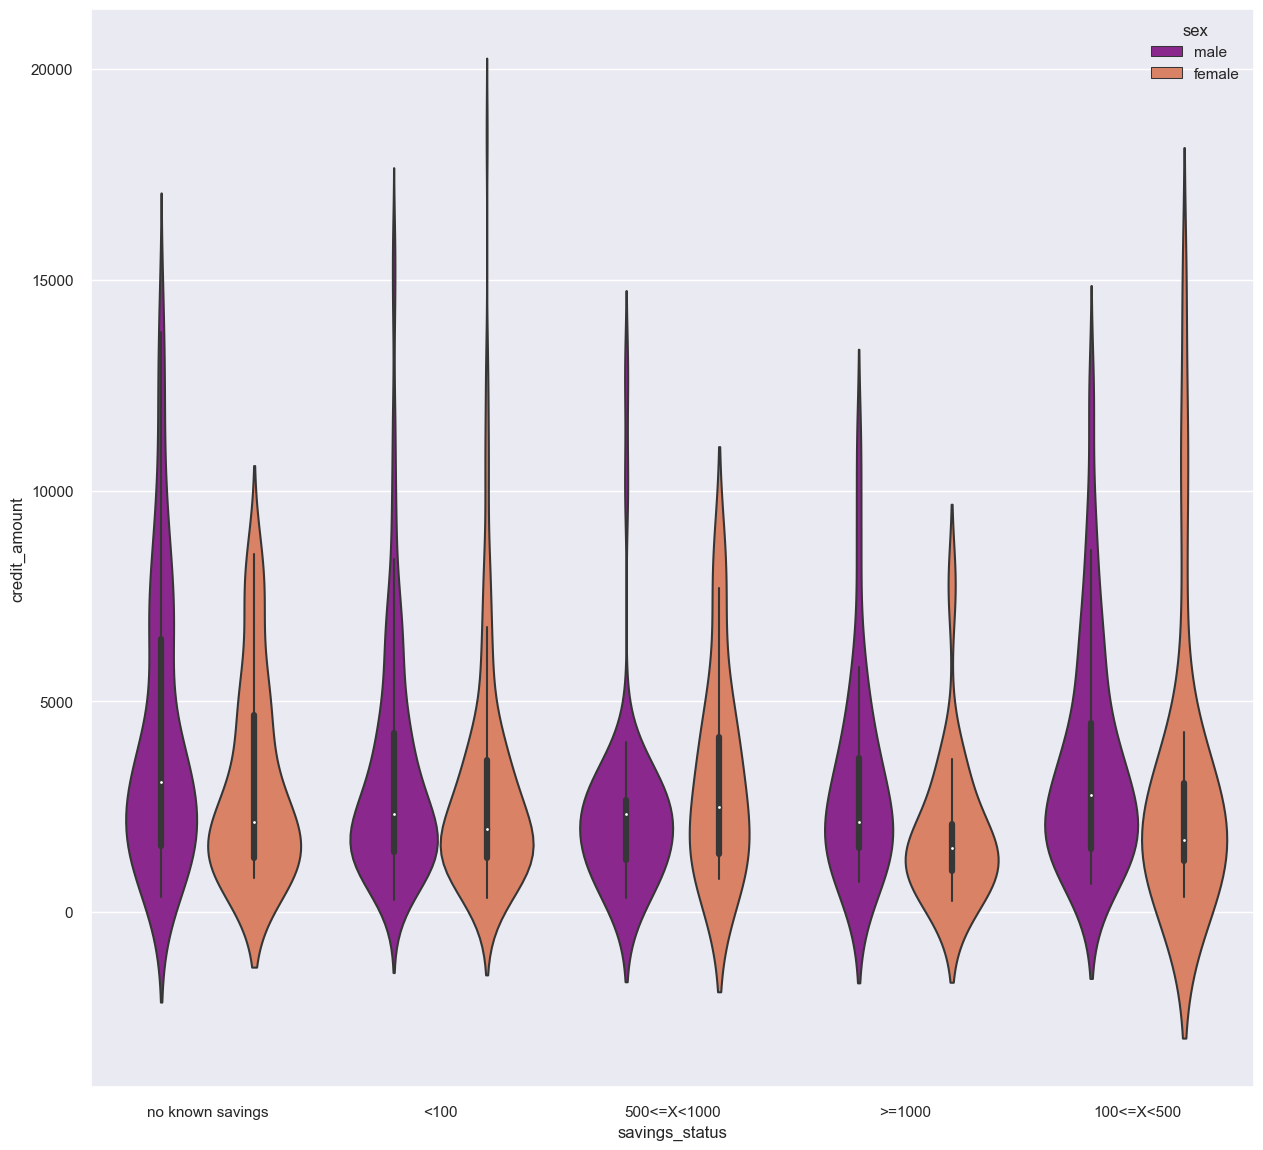

In [1449]:
ax = sns.violinplot(x="savings_status", y="credit_amount", hue='sex',
                 data=_df, palette="plasma")

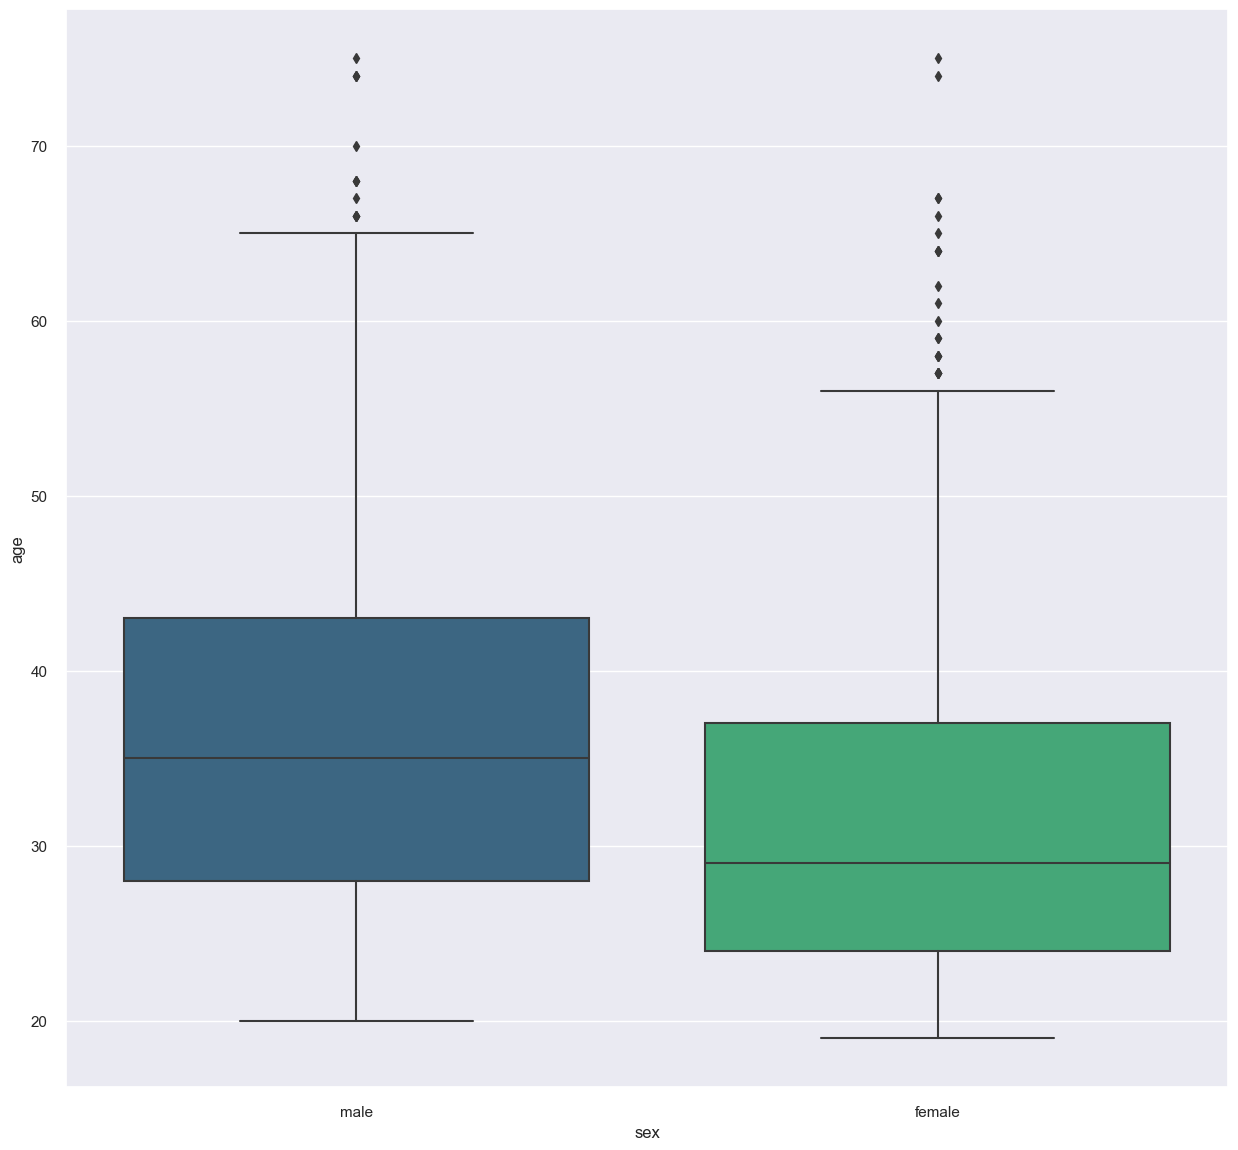

In [1450]:
ax = sns.boxplot(x="sex", y="age",
                 data=_df, palette="viridis")

<Axes: xlabel='checking_status', ylabel='count'>

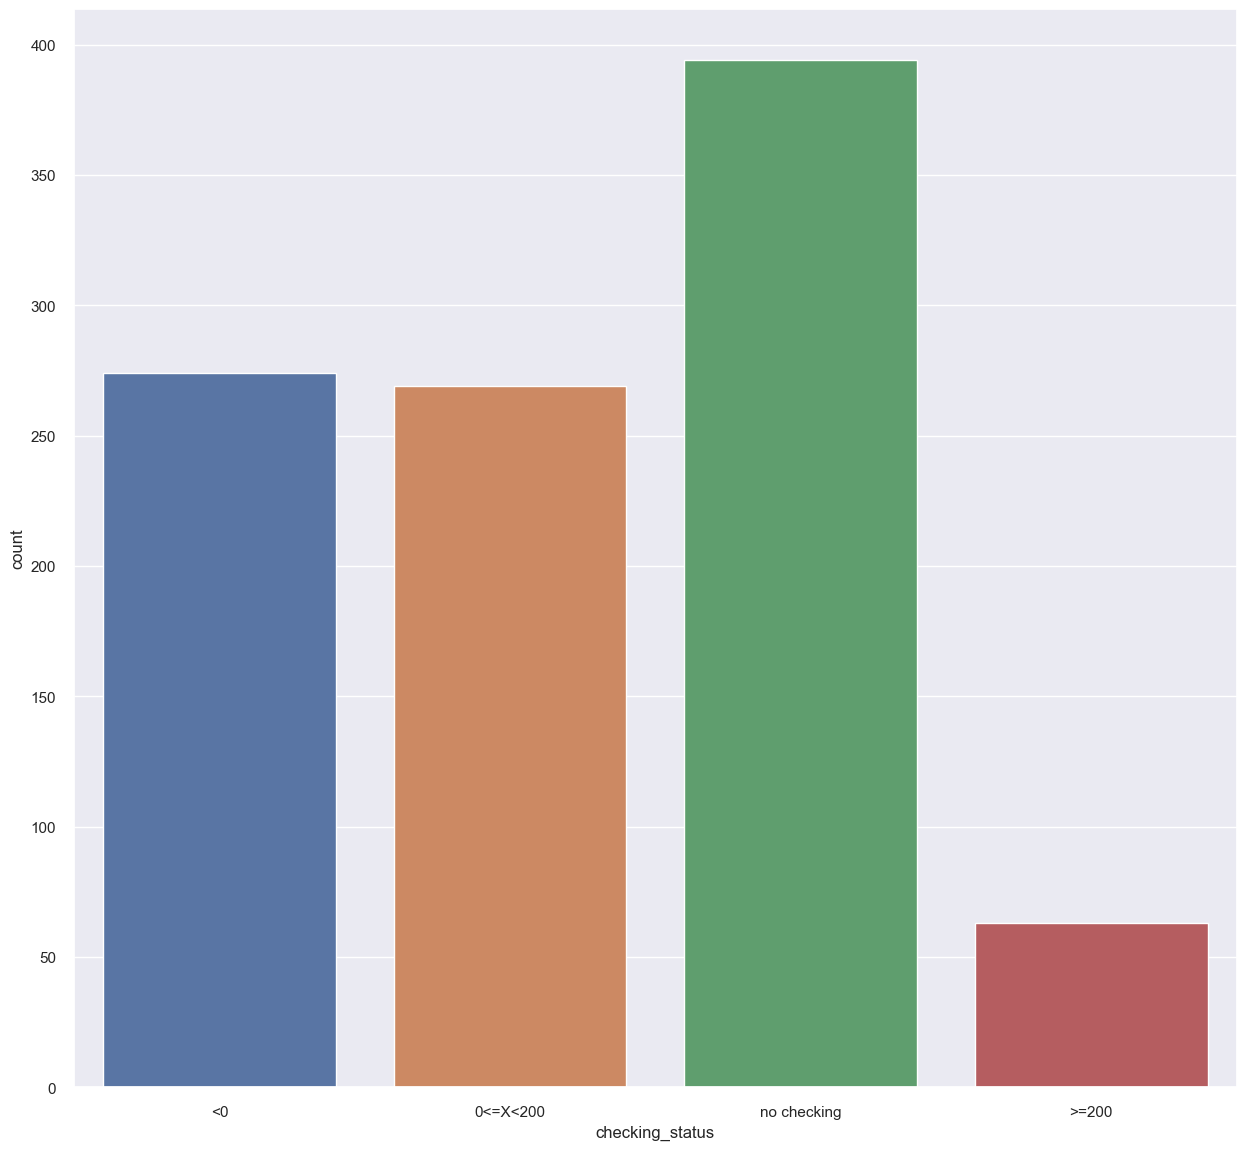

In [1451]:
sns.countplot(data = _df, x = 'checking_status')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


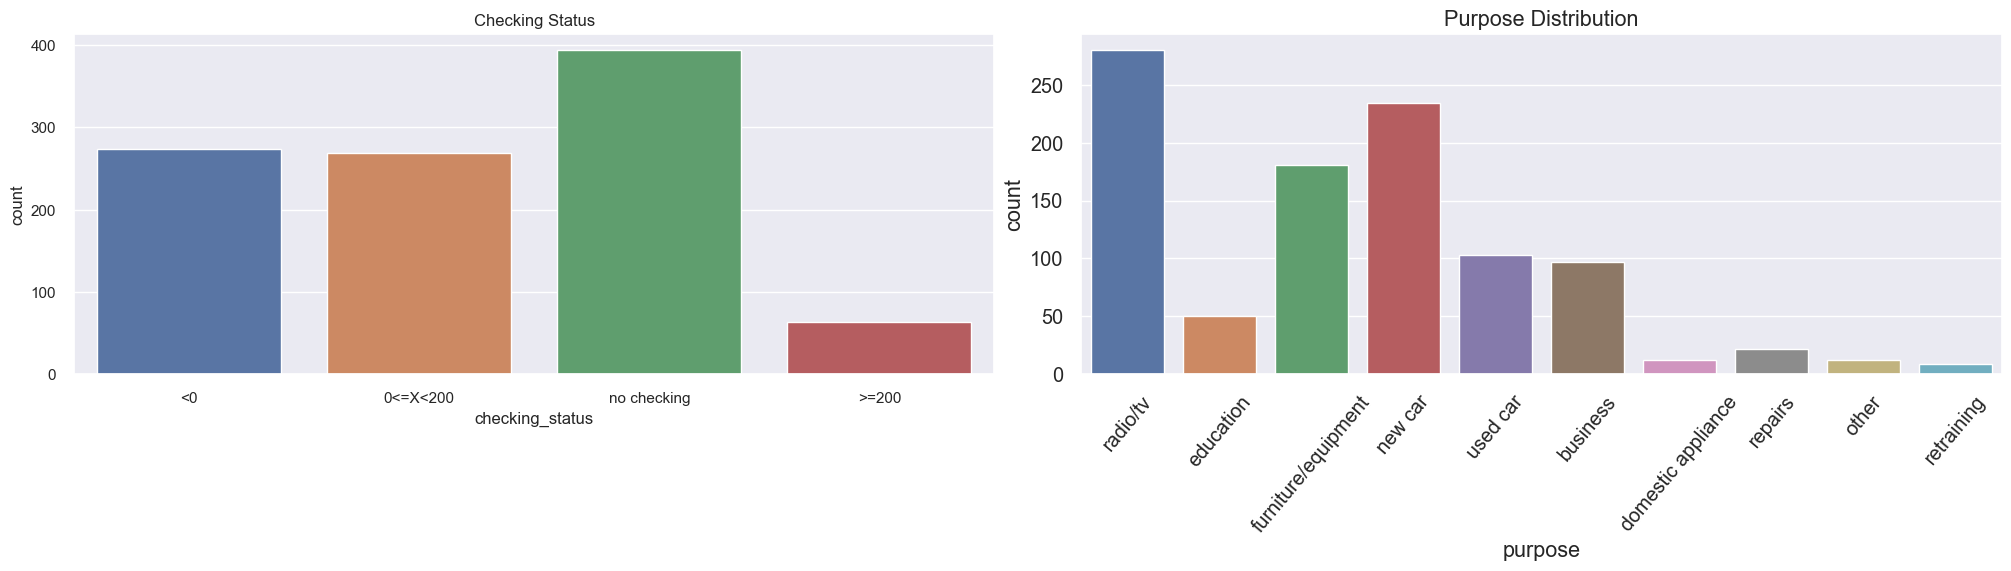

In [1452]:
fig = plt.figure(constrained_layout = True, figsize = (20,9))

grid = gridspec.GridSpec(ncols = 4, nrows = 2, figure = fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Checking Status')


sns.countplot(data = _df, x = 'checking_status')
sns.set(font_scale = 1.3)

ax1.legend()

ax2 = fig.add_subplot(grid[0, 2:])
ax2.set_title('Purpose Distribution')
sns.countplot(data = _df, x = 'purpose')
sns.set(font_scale = 1.5)
ax2.legend()
plt.xticks(rotation = 50)
plt.show();

C:\Users\troch\AppData\Local\Temp\ipykernel_19272\459687093.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\troch\AppData\Local\Temp\ipykernel_19272\459687093.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\troch\AppData\Local\Temp\ipykernel_19272\459687093.py:15: UserWarning:



`distplot` is 

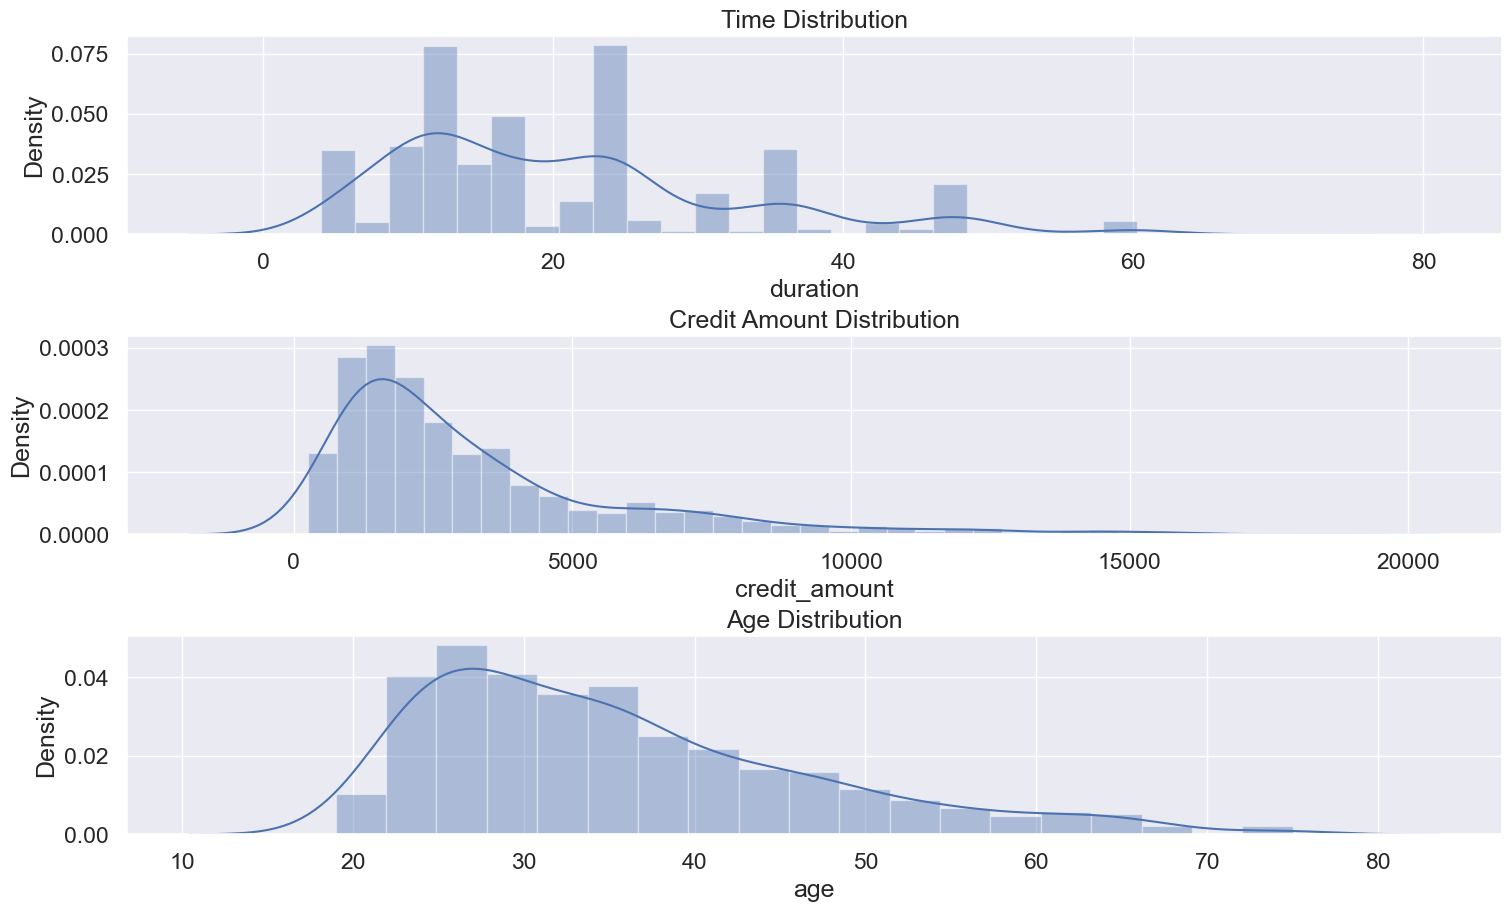

In [1453]:
fig = plt.figure(constrained_layout = True, figsize = (15,9));

grid = gridspec.GridSpec(ncols = 1, nrows = 3, figure = fig);
ax1 = fig.add_subplot(grid[0, :]);

sns.distplot(_df.duration, ax = ax1);
ax1.set_title('Time Distribution');

ax2 = fig.add_subplot(grid[1, :]);
sns.distplot(_df.credit_amount, ax = ax2);
ax2.set_title('Credit Amount Distribution');


ax3 = fig.add_subplot(grid[2, :]);
sns.distplot(_df.age, ax = ax3);
ax3.set_title('Age Distribution');
plt.show();

### Wykres sunberst : checking_status > risk > credit_history

In [1454]:
black_red1 = [
    '#1A1A1D', '#950740', '#C3073F'
]

fig = px.sunburst(_df,
                 path = [ 'checking_status','risk','credit_history'],
                 color = 'risk',
                 color_discrete_sequence = black_red1,
                 maxdepth = -1,
                 title = 'Sunburst Chart Checking Status > Risk > Credit History')
fig.update_traces(textinfo = 'label+percent parent')
fig.update_layout(margin=dict(t=5, l=5, r=5, b=5))
fig.show()

## Kodowanie zmiennych kategorycznych za pomocą LabelEncoder

In [1455]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [1456]:
categorical_feature_mask = _df.dtypes==object
categorical_cols = _df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'sex', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


In [1457]:
le = LabelEncoder()
_df[categorical_cols] = _df[categorical_cols].apply(lambda col: le.fit_transform(col))
_df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,1,6,1,6,1169,4,3,4,1,2,...,3,67,1,1,2,1,1,1,1,1
1,0,48,3,6,5951,2,0,2,0,2,...,3,22,1,1,1,1,1,0,1,0
2,3,12,1,2,2096,2,1,2,1,2,...,3,49,1,1,1,3,2,0,1,1
3,1,42,3,3,7882,2,1,2,1,1,...,1,45,1,0,1,1,2,0,1,1
4,1,24,2,4,4870,2,0,3,1,2,...,2,53,1,0,2,1,2,0,1,0
5,3,36,3,2,9055,4,0,2,1,2,...,2,35,1,0,1,3,2,1,1,1
6,3,24,3,3,2835,1,3,3,1,2,...,1,53,1,1,1,1,1,0,1,1
7,0,36,3,9,6948,2,0,2,1,2,...,0,35,1,2,1,0,1,1,1,1
8,3,12,3,6,3059,3,1,2,1,2,...,3,61,1,1,1,3,1,0,1,1
9,0,30,1,4,5234,2,4,4,1,2,...,0,28,1,1,2,0,1,0,1,0


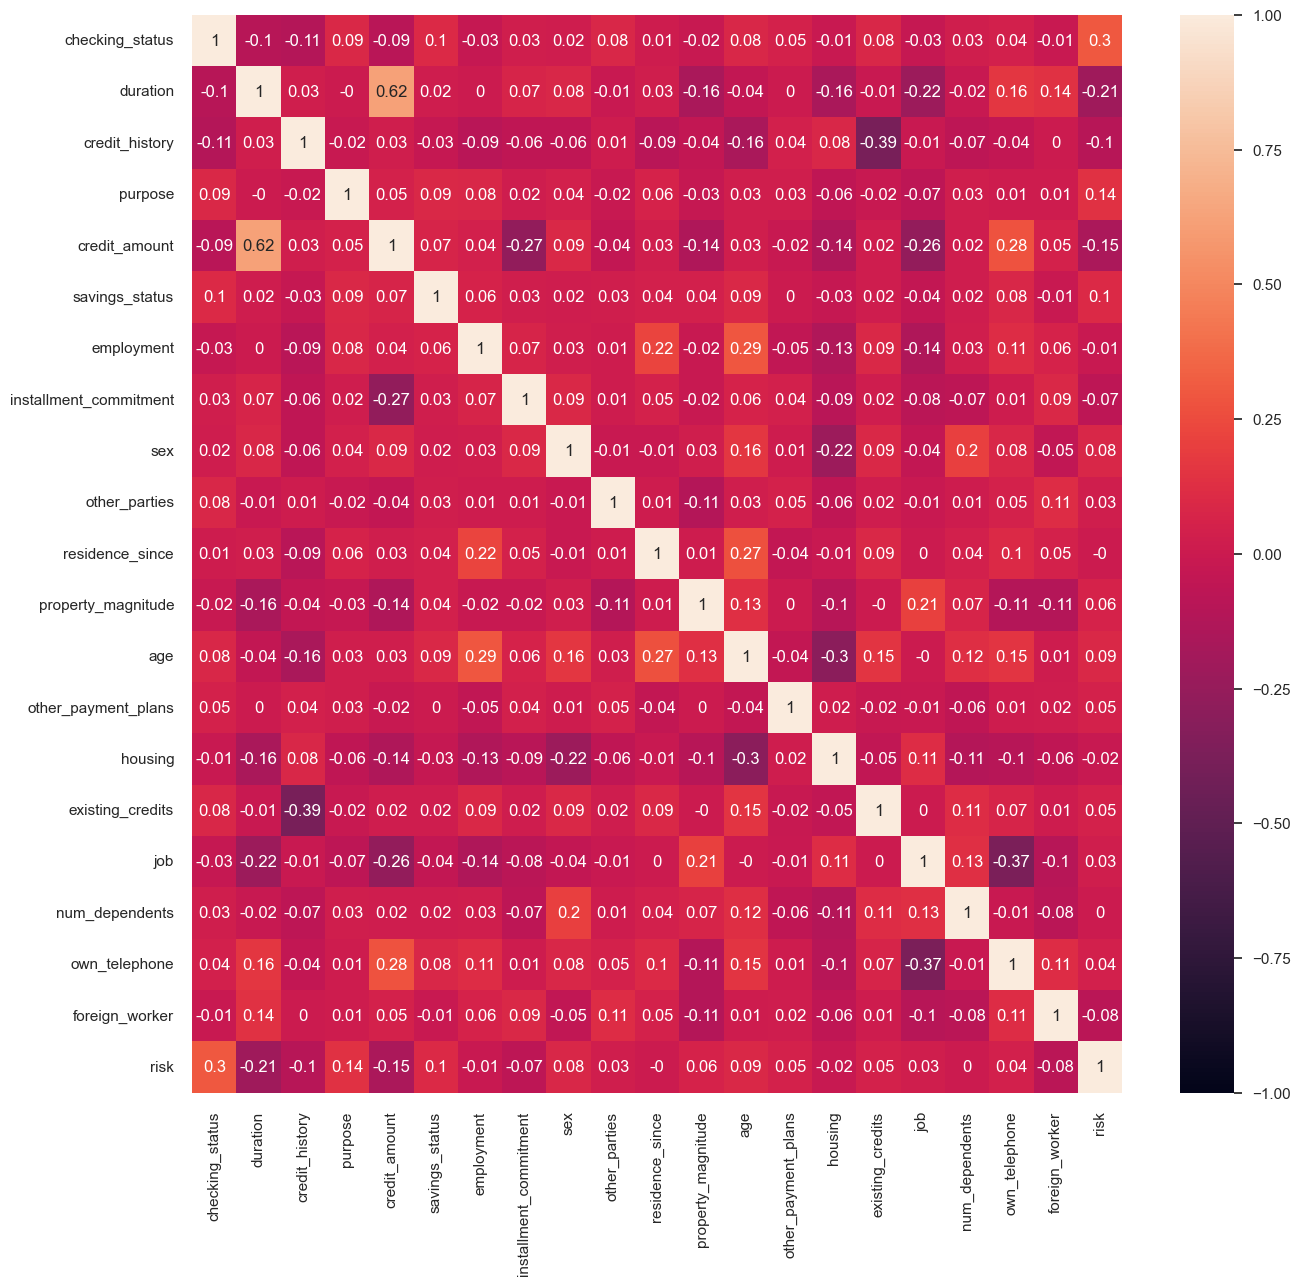

In [1458]:
correlation_matrix = np.round(_df.corr(),2) # policzenie korelacji
sns.set(rc={'figure.figsize':(15,14)}) # określenie rozmiaru rysunku
sns.heatmap(correlation_matrix, vmin=-1.,vmax=1.,annot=True) # wykonanie wykresu

pass

 ### Uogólnione modele liniowe -GML

In [1459]:
formula = 'risk ~ checking_status+duration+credit_history+purpose+credit_amount+savings_status+employment+installment_commitment+sex+other_parties+residence_since+property_magnitude+age+other_payment_plans+housing+existing_credits+job+num_dependents+own_telephone+foreign_worker'
model_glm = smf.glm(formula = formula, data=_df, family=sm.families.Binomial())
result = model_glm.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   risk   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      979
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -515.07
Date:                Tue, 18 Apr 2023   Deviance:                       1030.1
Time:                        20:29:17   Pearson chi2:                     940.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1743
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

Na podstawie wyników GLM wybrano tylko 7 cech z wartością p < 0,05.

Progiem istotności statystycznej jest wartość równa bądź mniejsza 5%.

In [1460]:
formula2 = 'risk ~ checking_status+duration+purpose+credit_amount+savings_status+installment_commitment+sex'
model_glm2 = smf.glm(formula = formula2, data=_df, family=sm.families.Binomial())
result2 = model_glm2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   risk   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      992
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -525.11
Date:                Tue, 18 Apr 2023   Deviance:                       1050.2
Time:                        20:29:17   Pearson chi2:                     959.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1576
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

# Regresja logistyczna

In [1461]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

# Budowa modelu

## Train Test Split

In [1462]:
from sklearn.model_selection import train_test_split

X = _df[['checking_status' , 'sex', 'credit_amount', 'checking_status', 'installment_commitment', 'duration','purpose']]
y = _df['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [1463]:
y_test

131    0
203    0
50     1
585    0
138    1
      ..
369    1
528    0
449    0
119    1
773    1
Name: risk, Length: 330, dtype: int64

## Trenowanie i predykcja

In [1464]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=123, max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
y_fit_train = model.predict(X_train)

In [1465]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [1466]:
print("Acc(train)", accuracy_score(model.predict(X_train), y_train))
print("Acc(test)", accuracy_score(model.predict(X_test), y_test))

Acc(train) 0.7208955223880597
Acc(test) 0.7121212121212122


## Ewaluacja

Każdy rząd w macierzy pomyłek reprezentuje  rzeczywista klasę, natomiast kolumna symbolizuje przewidywaną kasę. Pierwszy rząd w macierzy przechowuje wyniki tzw. klasy negtywnej, czyli nie otrzymania kredytu - risk/class = 0.
32 próbki zostały prawidłowo sklasyfikowane (są to tzw przykłady prawdziwie negatywne - PN), natomiast pozostałe 75 próbek zostało niewłaściwie uznanych za "dobrych" kredytobiorców (fałszywie pozytywnych - FP).
W drugim rzędzie zostały umieszczone próbki zaklasyfikowane jako "dobrych" kredytobiorców - risk/class = 1. 20 próbek zostało sklasyfikowanych jako "niebędące dobrymi" kredytobiorcami (fałszywie negatywne - FN), zas pozostałe 203 prawidłowo zostało rozpoznane jako "dobrzy kredytobiorcy".
Doskonały klasyfikator uzyskiwałby wyłącznie przykłady prawdziwie pozytywne i prawdziwie negatywne.

Poniższy model nie myli się w 73% (precision), a do tego prawidłowo rozpoznaje 91 % próbek (recall). 
Wynik F1-score stanowi średnią harmoniczną precyzji i pełności (recall).
W tym modelu zależy nam na jak najwększej pełności (recall), gdyż nic się nie stanie jak kilu klientów nie dostanie pozytywnego wyniku kredytowego, natomiast zależy nam, by jak  najwięcej klientów spłaciło swoje zobowiązanie kedytowe.


              precision    recall  f1-score   support

           0       0.62      0.30      0.40       107
           1       0.73      0.91      0.81       223

    accuracy                           0.71       330
   macro avg       0.67      0.60      0.61       330
weighted avg       0.69      0.71      0.68       330



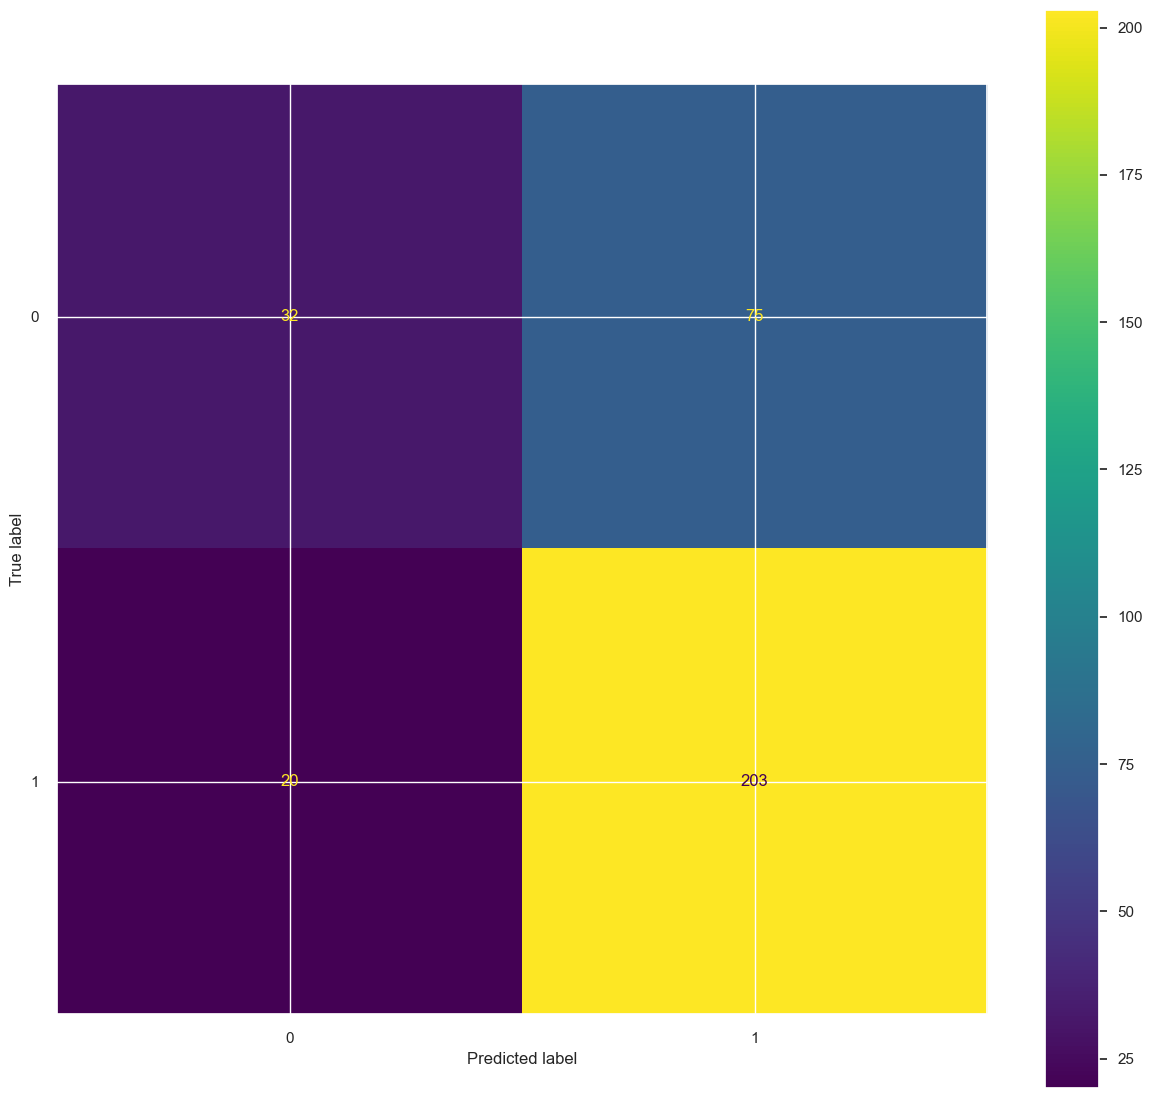

In [1467]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

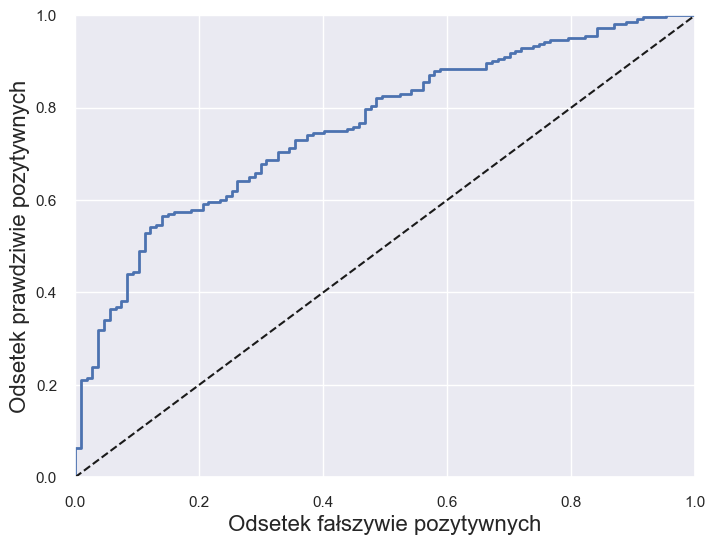

In [1468]:
x_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, x_pred_proba)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Odsetek fałszywie pozytywnych', fontsize=16)
    plt.ylabel('Odsetek prawdziwie pozytywnych', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


Wykres krzywej ROC stanowi narzędzie używane wraz z klasyfikatorami binarnymi, w tym przypadku rysujemy odsetek prawdziwie pozytywnych w funkcji odsetka fałszywie pozytywnych. Jest to odsetek negatywnych przykładów, które zostały nieprawidłowo sklasyfikowanych jako pozytywne. Otrzymujemy tą wartość odejmując odsetek prawdziwie negatywnych od liczby 1; jest to odsetek negatywnych próbek, które zostały prawidłowo sklasyfikowane jako negatywne.
Linia przerywana symbolizuje krzywą ROC całkowicie losowego klasyfikatora; dobry klasyfikator stara się nie zbliżać do tej prostej - tylko dąży do lewej górnej części wykresu.


In [1469]:
from sklearn.metrics import roc_auc_score

print('AUC regresji logistycznej:',roc_auc_score(y_test, x_pred_proba))

AUC regresji logistycznej: 0.7598591844432337


# Drzewo decyzyjne

In [1470]:

from sklearn.tree import DecisionTreeClassifier


In [1471]:
X = _df[['checking_status', 'duration', 'purpose', 'credit_amount', 'savings_status', 'installment_commitment', 'sex']]
y = _df['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## DecisionTreeClassifier

In [1472]:
model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4)
model.fit(X_train, y_train)
print("Acc(train)", accuracy_score(model.predict(X_train), y_train))
print("Acc(test)", accuracy_score(model.predict(X_test), y_test))

Acc(train) 0.7671641791044777
Acc(test) 0.7181818181818181


Ewaluacja: Poniższy model nie myli się w 70% (precision),  prawidłowo rozpoznaje 85 % próbek (recall). 

              precision    recall  f1-score   support

           0       0.33      0.17      0.22       101
           1       0.70      0.85      0.77       229

    accuracy                           0.64       330
   macro avg       0.51      0.51      0.49       330
weighted avg       0.58      0.64      0.60       330



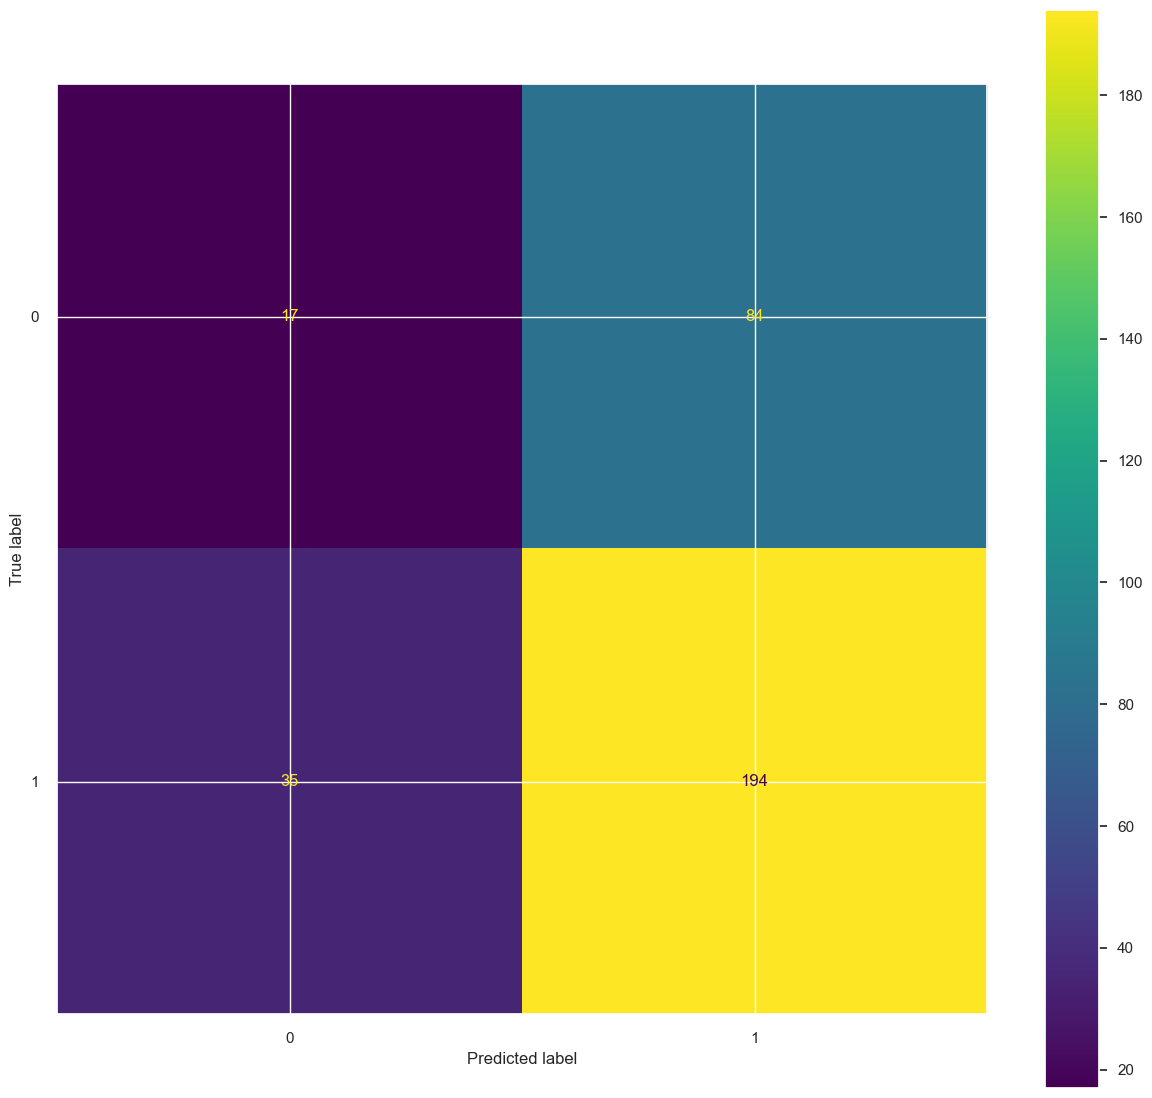

In [1473]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

In [1474]:
pred_proba = model.predict_proba(X_test)[:,1]
fpr_drz, tpr_drz, thresholds_drz = roc_curve(y_test, pred_proba)

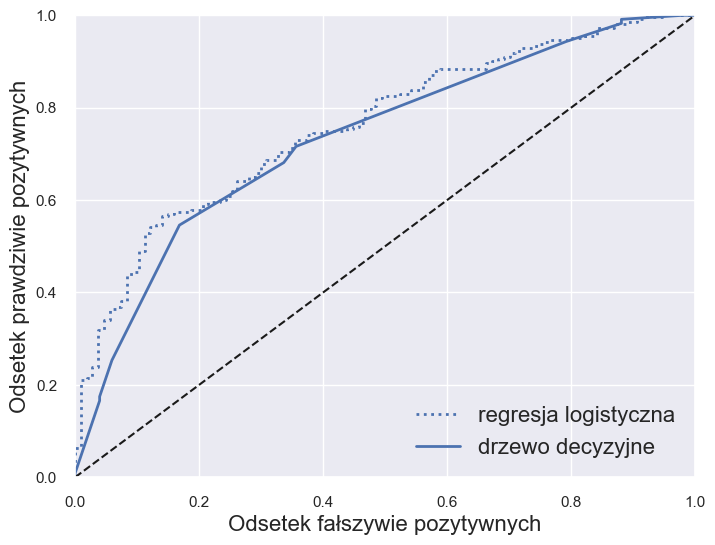

In [1475]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="regresja logistyczna")
plot_roc_curve(fpr_drz, tpr_drz, "drzewo decyzyjne")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [1476]:

print('AUC drzewa decyzyjnego:',roc_auc_score(y_test, pred_proba))

AUC drzewa decyzyjnego: 0.7339487223831552


Jednym ze sposobów porównywania klasyfikatorów jest pomiar obszaru pod krzywą (AUC). Obszar doskonałego klasyfikatora byłby równy 1.
Jak widać na rysunku krzywa ROC klasyfikatora LogisticRegression wygląda lepiej od krzywej klasyfikatora DecisionTreeClassifier. Dociera bliżej lewego górnego rogu wykresu. W związku z tym wynik AUC jest również lepszy.